In [4]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
FEMA = pd.read_csv(r"FEMA.csv")

In [3]:
NASA = pd.read_csv(r"NASA.csv")

In [4]:
#creates binary variable for modeling - Disaster Yer/No
FEMA['DR_YN'] = (FEMA['disasterNumber'] > 1)

In [5]:
#creates key to link NASA data with FEMA data

NASA['FEMAkey'] = NASA['COUNTYFP'].astype('str') + '-' + NASA['Time'].astype('str')

In [6]:
#removes non-water related disasters.  This code also moved to FEMA data prep.
incTypes = ['Hurricane', 'Severe Storm(s)', 'Coastal Storm']
FEMA = FEMA[FEMA.incidentType.isin(incTypes)]

In [7]:
#This is code also belongs in the FEMA data section
incidentbegin = FEMA[['IncidentBeginDatekey']]

In [8]:
#create new variable for declaration data and incident begin data to include DR number + text
FEMA['DR'] = 'DR' + '-' + FEMA['disasterNumber'].astype('str')
FEMA['IBD'] = 'IBD' + '-' + FEMA['disasterNumber'].astype('str')

In [9]:
FEMAsm = FEMA[['designatedArea', 'fipsCountyCode']]

In [10]:
FEMAsm1 = FEMAsm.sort_values('fipsCountyCode').groupby('fipsCountyCode').tail(1)

In [11]:
Merge = pd.merge(NASA, FEMAsm1, left_on='COUNTYFP', right_on='fipsCountyCode', how='left')

In [12]:
Merge2 = pd.merge(Merge, FEMA, left_on="FEMAkey", right_on='DecDateKey', how='left')

In [13]:
Merge3 = pd.merge(Merge2, incidentbegin, left_on="FEMAkey", right_on='IncidentBeginDatekey', how='left')

In [14]:
#1) reduce the number of columns in the NASA dataset

In [15]:
NASAset = Merge3[['Time', 'DR', 'DR_YN', 'geometry', 'NAME', 'FEMAkey', 'Precip']]

In [16]:
#Creates 21 days of precipitation as features for each day
NASAset['day_1_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-1)
NASAset['day_2_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-2)
NASAset['day_3_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-3)
NASAset['day_4_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-4)
NASAset['day_5_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-5)
NASAset['day_6_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-6)
NASAset['day_7_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-7)
NASAset['day_8_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-8)
NASAset['day_9_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-9)
NASAset['day_10_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-10)
NASAset['day_11_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-11)
NASAset['day_12_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-12)
NASAset['day_13_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-13)
NASAset['day_14_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-14)
NASAset['day_15_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-15)
NASAset['day_16_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-16)
NASAset['day_17_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-17)
NASAset['day_18_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-18)
NASAset['day_19_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-19)
NASAset['day_20_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-20)
NASAset['day_21_Precip'] = NASAset.groupby('geometry')['Precip'].shift(-21)

/home/bill/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bill/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bill/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [17]:
NASAset = NASAset.fillna(0)
NASAset['DR_YN'] = NASAset['DR_YN'].astype(int)

In [18]:
NASAset.columns

Index(['Time', 'DR', 'DR_YN', 'geometry', 'NAME', 'FEMAkey', 'Precip',
       'day_1_Precip', 'day_2_Precip', 'day_3_Precip', 'day_4_Precip',
       'day_5_Precip', 'day_6_Precip', 'day_7_Precip', 'day_8_Precip',
       'day_9_Precip', 'day_10_Precip', 'day_11_Precip', 'day_12_Precip',
       'day_13_Precip', 'day_14_Precip', 'day_15_Precip', 'day_16_Precip',
       'day_17_Precip', 'day_18_Precip', 'day_19_Precip', 'day_20_Precip',
       'day_21_Precip'],
      dtype='object')

In [19]:
#create new feature of sum of precipitation days 4 to 21
NASAset['Precip_sum'] =  (NASAset['day_4_Precip'] + NASAset['day_5_Precip'] + NASAset['day_6_Precip'] + NASAset['day_7_Precip'] + NASAset['day_8_Precip'] + NASAset['day_9_Precip'] + NASAset['day_10_Precip'] + NASAset['day_11_Precip'] + NASAset['day_12_Precip'] + NASAset['day_13_Precip'] + NASAset['day_14_Precip'] + NASAset['day_15_Precip'] + NASAset['day_16_Precip'] + NASAset['day_17_Precip'] + NASAset['day_18_Precip'] + NASAset['day_19_Precip'] + NASAset['day_20_Precip'] + NASAset['day_21_Precip'])

In [43]:
NASAset['Precip_sum']
#NASAset.to_csv('NASAset.csv')
#HERE

In [21]:
#Following four cells creates a smaller sample of non-disasters for modeling.  Skip to 5th cell to model with
#complete data set
list(NASAset)

In [44]:
#crete subdataframe of days in which a disaster was not declared.
NASAsetsubF = NASAset[NASAset.DR_YN == False]

In [45]:
#crete subdataframe of days in which a disaster was declared.
NASAsetsubT = NASAset[NASAset.DR_YN == True]

In [46]:
#randome sample with replacement of non-disaster days, around 3X the number of disasters
NASAsetsubF = NASAsetsubF.sample(39000)

In [47]:
#concatanates dataframes to create full dataframe for modeling
NASAsetM = pd.concat([NASAsetsubF, NASAsetsubT])

In [48]:
##use this cell to model with complete data set
NASAsetM = NASAset
NASAset.to_csv('NASAsetM.csv')
list(NASAset)

['Time',
 'DR',
 'DR_YN',
 'geometry',
 'NAME',
 'FEMAkey',
 'Precip',
 'day_1_Precip',
 'day_2_Precip',
 'day_3_Precip',
 'day_4_Precip',
 'day_5_Precip',
 'day_6_Precip',
 'day_7_Precip',
 'day_8_Precip',
 'day_9_Precip',
 'day_10_Precip',
 'day_11_Precip',
 'day_12_Precip',
 'day_13_Precip',
 'day_14_Precip',
 'day_15_Precip',
 'day_16_Precip',
 'day_17_Precip',
 'day_18_Precip',
 'day_19_Precip',
 'day_20_Precip',
 'day_21_Precip',
 'Precip_sum',
 'NAME_code']

In [27]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
NASAsetM['NAME_code'] = LE.fit_transform(NASAsetM['NAME'])

In [28]:
NASAsetM.columns

Index(['Time', 'DR', 'DR_YN', 'geometry', 'NAME', 'FEMAkey', 'Precip',
       'day_1_Precip', 'day_2_Precip', 'day_3_Precip', 'day_4_Precip',
       'day_5_Precip', 'day_6_Precip', 'day_7_Precip', 'day_8_Precip',
       'day_9_Precip', 'day_10_Precip', 'day_11_Precip', 'day_12_Precip',
       'day_13_Precip', 'day_14_Precip', 'day_15_Precip', 'day_16_Precip',
       'day_17_Precip', 'day_18_Precip', 'day_19_Precip', 'day_20_Precip',
       'day_21_Precip', 'Precip_sum', 'NAME_code'],
      dtype='object')

In [29]:
#selects different sets of features for modeling.  I find 'feature_cols1' works best.
feature_colsall = []
feature_cols = ['Time', 'NAME_code', 'Precip', 'day_1_Precip',
       'day_2_Precip', 'day_3_Precip', 'day_4_Precip', 'day_5_Precip',
       'day_6_Precip', 'day_7_Precip', 'day_8_Precip', 'day_9_Precip',
       'day_10_Precip', 'day_11_Precip', 'day_12_Precip', 'day_13_Precip',
       'day_14_Precip', 'day_15_Precip', 'day_16_Precip', 'day_17_Precip',
       'day_18_Precip', 'day_19_Precip', 'day_20_Precip', 'day_21_Precip']
feature_cols1 = ['Time', 'day_1_Precip',
       'day_2_Precip', 'day_3_Precip', 'day_4_Precip', 'day_5_Precip',
       'day_6_Precip', 'day_7_Precip', 'day_8_Precip', 'day_9_Precip',
       'day_10_Precip', 'day_11_Precip', 'day_12_Precip', 'day_13_Precip',
       'day_14_Precip', 'day_15_Precip', 'day_16_Precip', 'day_17_Precip',
       'day_18_Precip', 'day_19_Precip', 'day_20_Precip', 'day_21_Precip']
feature_cols2 = ['Time', 'day_1_Precip', 'day_2_Precip', 'day_3_Precip',
       'Precip_sum']

In [30]:
X = NASAsetM[feature_cols1]
y = NASAsetM.DR_YN

In [35]:
import pandas as pd
df = pd.read_csv('FEMAV3.csv')
X = df[['startDate','endDate','county','open','close','min','max','delta','average']].dropna(axis='columns')
y = df[['disaster']]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/bill/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14012,     0],
       [  913,     0]])

Text(0.5, 257.44, 'Predicted label')

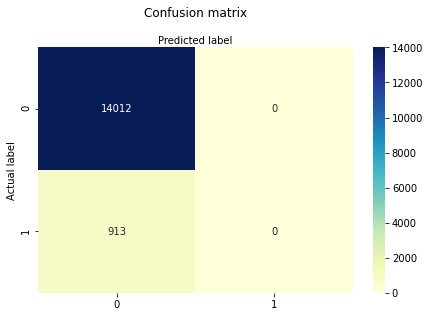

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
#plt.figure(figsize=(9,9))
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
#plt.ylabel('Actual label');
#plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

NameError: name 'cm' is not defined

<Figure size 648x648 with 0 Axes>

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97     14012
        True       0.00      0.00      0.00       913

    accuracy                           0.94     14925
   macro avg       0.47      0.50      0.48     14925
weighted avg       0.88      0.94      0.91     14925



/home/bill/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#create smaller random sample of non-DR -- start with 10X the number of DR instances

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9388274706867672
Precision: 0.0
Recall: 0.0


/home/bill/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =10, class_weight="balanced").fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on test set: 0.91


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     14012
        True       0.41      0.99      0.58       913

    accuracy                           0.91     14925
   macro avg       0.71      0.95      0.77     14925
weighted avg       0.96      0.91      0.93     14925



In [11]:
#Lucas.  My browser crashed and I lost the code you sent and didn't get this to run yet.  
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=4, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())

NameError: name 'RFE' is not defined

In [12]:
sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(X_train, y_train)
print(sel_f.get_support())

NameError: name 'SelectKBest' is not defined

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X.shape

(59697, 7)

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=30, class_weight="balanced").fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print(classification_report(y_test, y_pred))
print("Feature importances:\n{}".format(clf.feature_importances_))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14012
        True       1.00      0.98      0.99       913

    accuracy                           1.00     14925
   macro avg       1.00      0.99      0.99     14925
weighted avg       1.00      1.00      1.00     14925

Feature importances:
[3.92640502e-01 5.67911247e-01 1.51028358e-03 4.49199475e-05
 1.99958587e-03 1.00334356e-03 3.48901186e-02]


In [17]:
import pickle
pick = open('nasa.pkl', 'wb')
pickle.dump(clf,pick)

In [39]:
pick = open('nasa.pkl', 'rb')
idf =pickle.load(pick)
print(X_test)
test = np.array([18300,18307,12131,0,21.725683,21.725683,3.83355227557354]).reshape(1, -1)
idf.predict(test)

       startDate  endDate  county  min         max       delta   average
46416      11810    11817   12089  0.0    0.191768    0.191768  0.009165
3812       13122    13129   12095  0.0   25.495740   25.495740  4.393972
11415      16922    16929   12117  0.0   70.838590   70.838590  9.638593
1650       17210    17217   12085  0.0    7.165188    7.165188  0.714358
9530       16098    16105   12047  0.0   15.127089   15.127089  1.777778
...          ...      ...     ...  ...         ...         ...       ...
8394       14138    14145   12115  0.0  154.939010  154.939010  8.372206
23437      13306    13313   12111  0.0   21.446940   21.446940  5.448523
7809       16586    16593   12083  0.0   48.517860   48.517860  5.839031
39921      16874    16881   12109  0.0   39.357994   39.357994  3.915672
19844      13074    13081   12041  0.0   12.870423   12.870423  1.526291

[14925 rows x 7 columns]


array([False])

In [28]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/home/bill/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/bill/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(59697, 5)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X.shape

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               


/home/bill/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


(59697, 2)

In [ ]:
#Ran the model with just Precipitation data and time and got suspiciously high scores.

feature_cols = ['Time', 'Precip', 'day_1_Precip',
       'day_2_Precip', 'day_3_Precip', 'day_4_Precip', 'day_5_Precip',
       'day_6_Precip', 'day_7_Precip', 'day_8_Precip', 'day_9_Precip',
       'day_10_Precip', 'day_11_Precip', 'day_12_Precip', 'day_13_Precip',
       'day_14_Precip', 'day_15_Precip', 'day_16_Precip', 'day_17_Precip',
       'day_18_Precip', 'day_19_Precip', 'day_20_Precip', 'day_21_Precip']


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[2485568,       0],
       [   3298,       0]])

  precision    recall  f1-score   support

           0       1.00      1.00      1.00   2485568
           1       0.90      0.84      0.87      3298

    accuracy                           1.00   2488866
   macro avg       0.95      0.92      0.93   2488866
weighted avg       1.00      1.00      1.00   2488866



Accuracy: 0.9996689255267258
Precision: 0.9011024643320363
Recall: 0.8426318981200728


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=22,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(...)

print(clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0 ,0, 0, 0]]))

     